# Home work 1 
## Task 1

In [1]:
# Package imports
import numpy as np

In [2]:
import sklearn.datasets

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import time
from IPython import display

I added a progress bar to make it easier to observe the learning processes.

In [5]:
from tqdm import trange

In [6]:
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [7]:
def activation(x):
    return np.where( x > 0 , 1, 0)

In [8]:
def perceptron(w, x):
    return activation(np.dot(x, w))

The function adds a column of ones to the left of the array

In [9]:
def addRowWithOnes(X):
    n,m = X.shape
    X0 = np.ones((n,1))
    return np.hstack((X0, X))

The function for rendering the results had to be changed.

1. I added variables to the function signature to get rid of the global variables.
2. Added ones so that the user would not do it manually when using the function.

In [10]:
def plot_decision_boundary(pred_func, data_set):
    # Set min and max values and give it some padding
    x_min, x_max = data_set[:, 0].min() - .5, data_set[:, 0].max() + .5
    y_min, y_max = data_set[:, 1].min() - .5, data_set[:, 1].max() + .5
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    inp = np.c_[xx.ravel(), yy.ravel()]
    inp_for_grind = addRowWithOnes(inp)

    Z = pred_func(inp_for_grind)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(data_set[:, 0], data_set[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

## Generating a dataset

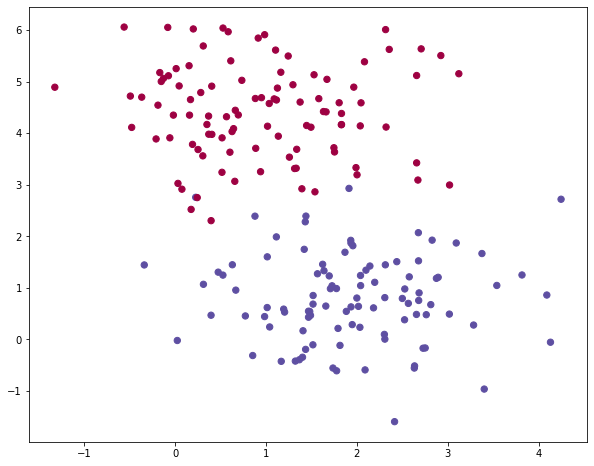

In [11]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200, centers=2, cluster_std=0.9)
X[0] += 1.5
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

## Train model

In [12]:
# initialize weights randomly with mean 0 - [-1; 1]
w = 2*np.random.random((3,)) - 1 

In [13]:
XWithOnesRow = addRowWithOnes(X)

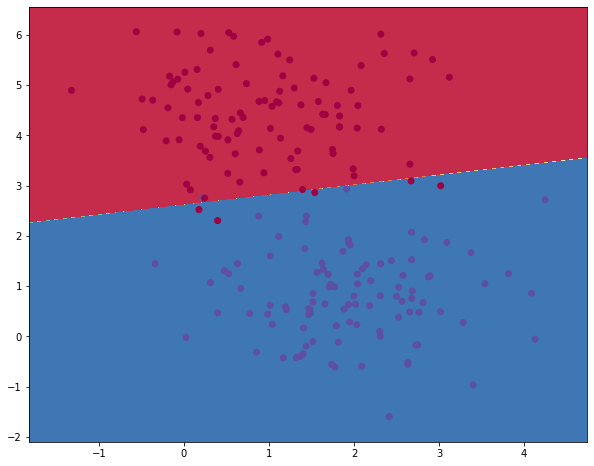

'Error:0.03'

100%|██████████| 100/100 [01:11<00:00,  1.41it/s]


array([ 46.19706984,   1.87990227, -20.45764497])

In [15]:
LR = 0.22
NUMBER_OF_ITERATIONS = 100

for j in trange(NUMBER_OF_ITERATIONS):
    # get preds
    pred = perceptron(w, XWithOnesRow)
    
    # how much did we miss?
    diff = y - pred
    error = np.mean(np.abs(diff))
    

    # draw result
    display.clear_output(wait=True)
    plot_decision_boundary(lambda x: perceptron(w, x), X)
    display.display("Error:" + str(error))
    time.sleep(0.5)
    
    # update weights
    w = w + LR * np.dot(XWithOnesRow.T, diff)

w